https://github.com/NanoComp/meep/blob/master/python/examples/straight-waveguide.ipynb  

https://stackoverflow.com/questions/29454002/filenotfounderror-errno-2-no-such-file-or-directory-ffmpeg


In [3]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [30]:
cell = mp.Vector3(16,8,0)

geometry = [mp.Block(mp.Vector3(mp.inf,1,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-7,0))]

pml_layers = [mp.PML(1.0)]

resolution = 10


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)



-----------
Initializing structure...
time for choose_chunkdivision = 0.000129938 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0435529 s
-----------


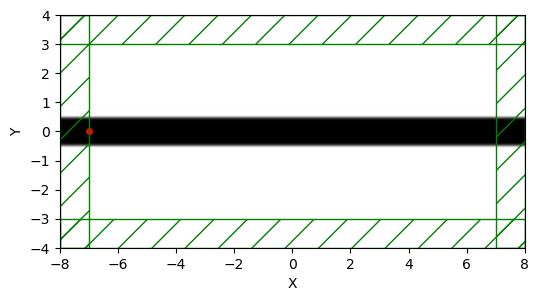

In [31]:
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

run 0 finished at t = 200.0 (4000 timesteps)


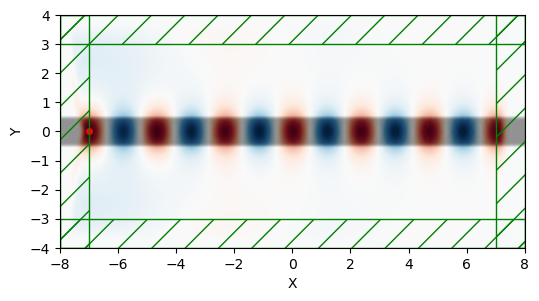

In [32]:
sim.run(until=200)

plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [33]:
T=0.1

sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(T,Animate),until=T*200)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000408888 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0627069 s
-----------
Normalizing field data...
run 1 finished at t = 20.0 (400 timesteps)


In [34]:
#Animate.to_gif(10,"test.gif")

filename = "straight_waveguide.mp4"
Animate.to_mp4(10,filename)

Generating MP4...


In [35]:
from IPython.display import Video
Video(filename)

In [36]:
# pngにプロット

T = 0.1
N = 100
#sim.use_output_directory()
sim.run(mp.at_every(T , mp.output_png(mp.Ez, "-Zc dkbluered")), until=N*T)        

creating output file "./ez-000020.00.h5"...
on time step 400 (time=20), 0.119503 s/step
creating output file "./ez-000020.10.h5"...
creating output file "./ez-000020.20.h5"...
creating output file "./ez-000020.30.h5"...
creating output file "./ez-000020.40.h5"...
creating output file "./ez-000020.50.h5"...
creating output file "./ez-000020.60.h5"...
creating output file "./ez-000020.70.h5"...
creating output file "./ez-000020.80.h5"...
creating output file "./ez-000020.90.h5"...
creating output file "./ez-000021.00.h5"...
creating output file "./ez-000021.10.h5"...
creating output file "./ez-000021.20.h5"...
creating output file "./ez-000021.30.h5"...
creating output file "./ez-000021.40.h5"...
creating output file "./ez-000021.50.h5"...
creating output file "./ez-000021.60.h5"...
creating output file "./ez-000021.70.h5"...
creating output file "./ez-000021.80.h5"...
creating output file "./ez-000021.90.h5"...
creating output file "./ez-000022.00.h5"...
creating output file "./ez-00002

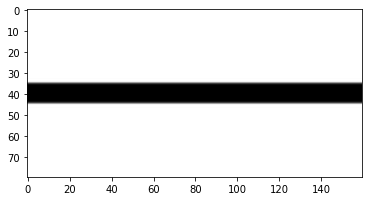

In [37]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
#plt.axis('off')
plt.show()

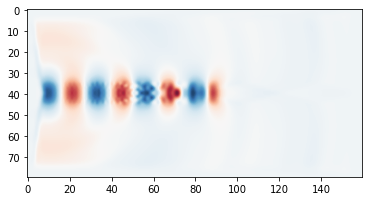

In [38]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
#plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
#plt.axis('off')
plt.show()